In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

which_beta = "$\\beta$ evaluated | 1/2"

# segregation table import #

In [3]:
name_root_1NP_150kb = "mesc_46C_150kb_481x1"

if(name_root_1NP_150kb!= settings.name_root):
    raise ValueError("Change name_root in settings.py and then restart the notebook")

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_150kb + "/"
file_name_2 = "segregation_" + name_root_1NP_150kb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_1NP_150kb = pickle.load(f)

start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP_150kb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)


# Statistics of $\pi$ in chr7 and 18 #

nan percentage in cosegregation

la percentuale dei nan nelle pi è esattamente corrispondente alla percentuale di nan nelle coseg, l'unica cosa a cui porre attenzione è che questa percentuale viene calcolata sulle squareform i.e. escludendo totalmente la diagonale

## Cosegregations of chr7 and chr18 ##

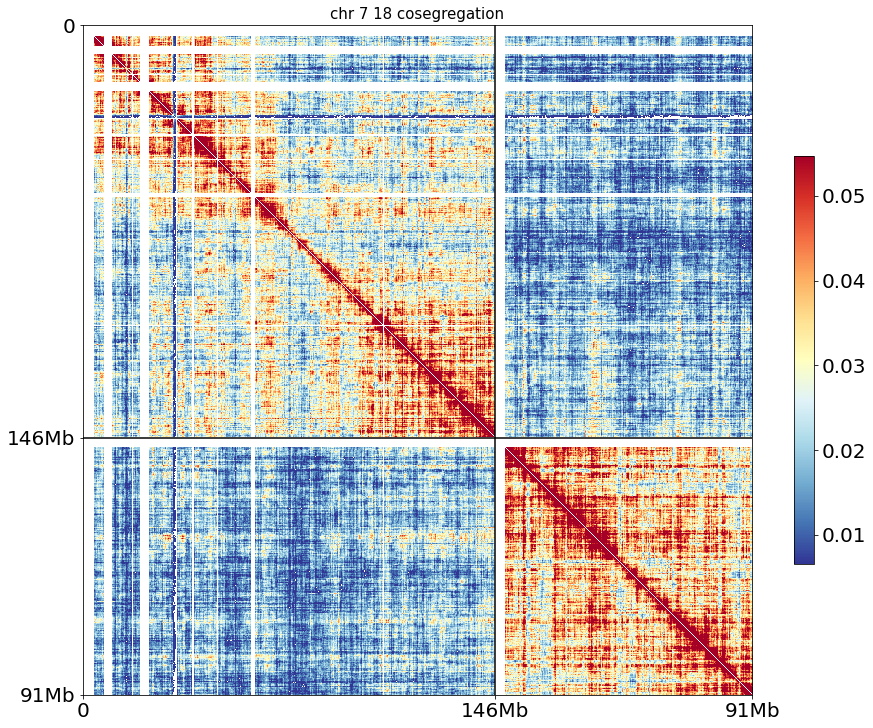

In [4]:
chr7_1NP_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_150kb['chr7']['segregation_table'])
chr18_1NP_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_150kb['chr18']['segregation_table'])
chr7_18_1NP_150kb_coseg = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table'])

chr7_1NP_150kb_coseg[chr7_1NP_150kb_coseg == 0] = np.nan
chr18_1NP_150kb_coseg[chr18_1NP_150kb_coseg == 0] = np.nan
chr7_18_1NP_150kb_coseg[chr7_18_1NP_150kb_coseg == 0] = np.nan

plot_heatmap_two_chromosomes(chr7_1NP_150kb_coseg, chr18_1NP_150kb_coseg, chr7_18_1NP_150kb_coseg, colormap = "RdYlBu_r", title = "chr 7 18 cosegregation", resolution=150E3);


/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:40: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)
/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:40: RuntimeWarning: invalid value encountered in true_divide
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)
/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:56: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)
/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:56: RuntimeWarning: invalid value encountered in true_divide
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)


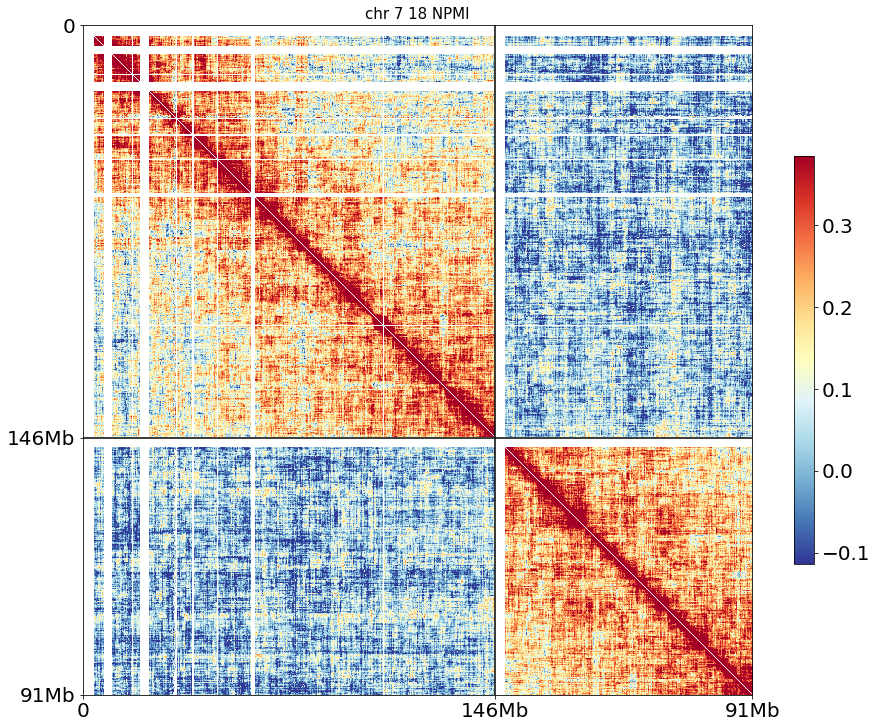

In [5]:
chr7_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr7']['segregation_table'])
chr18_1NP_150kb_npmi = compute_npmi(segregation_table_1NP_150kb['chr18']['segregation_table'])
chr7_18_1NP_150kb_npmi = compute_npmi_inter(segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table'])


plot_heatmap_two_chromosomes(chr7_1NP_150kb_npmi, chr18_1NP_150kb_npmi, chr7_18_1NP_150kb_npmi, colormap = "RdYlBu_r", title = "chr 7 18 NPMI", resolution=150E3);

## intra ##

In [6]:
from src.slice_pairwise import single_chromosome

### chromosome 7 ###

chromosome 7 1NP 150kb, seed =  216841 :


Computing PIs for chr7 ...
% of NaN PI values: 17.329801155405193 %
% of PI < 0 (out of non-nans): 51.56529505483616 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 7.135006859346085 %
Mean PI value: 0.047325324689013425
STD PI value: 0.036704159915010054
Mean SIGNIFICATIVE PI value: 0.11296979418761911
STD SIGNIFICATIVE PI value: 0.028686153630493885
Done

Absolute percentage of zeros:  42.62913195663507
Absolute percentage of significative:  5.898524358196887


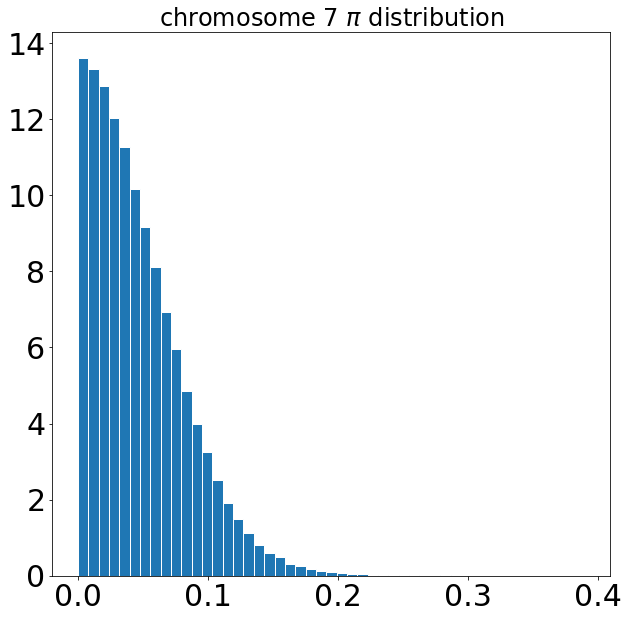

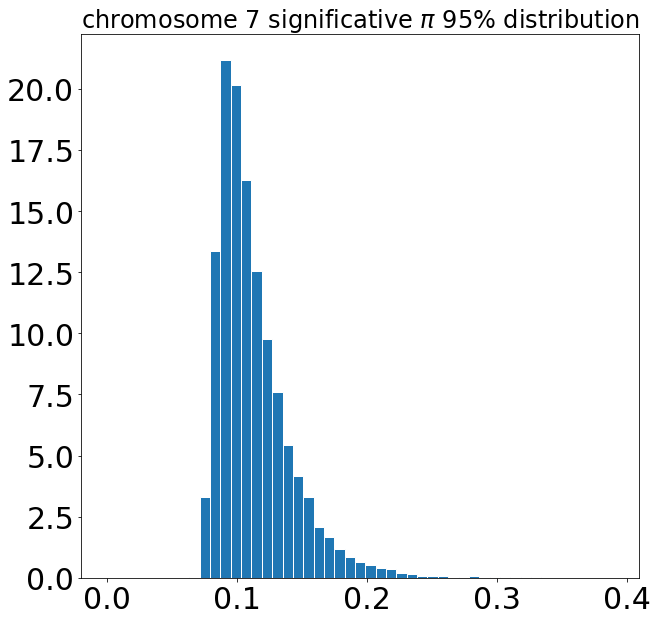

In [8]:
s = 216841
rg = Generator(MT19937(s))
print("chromosome 7 1NP 150kb, seed = ", s , ":\n")


chr7_1NP_150kb_pi, chr7_1NP_150kb_sign_pi = single_chromosome('chr7', segregation_table_1NP_150kb['chr7']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

del rg, s

print( "Absolute percentage of zeros: ", (1 - 0.17329801155405193) * 0.5156529505483616 * 100)
print( "Absolute percentage of significative: ", (1 - 0.17329801155405193) * 0.07135006859346085 * 100)

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr7_1NP_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_150kb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 7 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr7_1NP_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 7 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

In [62]:
def pi_nan_statistics(pi, sign_pi, seg_table):
    """ Function that returns the number of NaN, pi<0 and significative pi for a given pi matrix """
    coseg_zeros = compute_tube_cosegregation_matrix(seg_table)
    F_arr_A= compute_tube_segregation_frequency(seg_table)

    coseg_zeros[:, np.isnan(F_arr_A)] = np.nan
    coseg_zeros[np.isnan(F_arr_A), :] = np.nan
    
    a = ((np.count_nonzero(np.isnan(pi)) - pi.shape[0]   )) /((pi.shape[0]) * ((pi.shape[0]) - 1))
    b = 1 - ((np.count_nonzero(np.isnan(sign_pi)) - sign_pi.shape[0]   )) /((sign_pi.shape[0]) * ((sign_pi.shape[0]) - 1))
    c = (np.count_nonzero(np.isnan(coseg_zeros))  -coseg_zeros.shape[0]  )/((coseg_zeros.shape[0]) * ((coseg_zeros.shape[0]) - 1))

    print("number of GAM nan:\t", c, "\nnumber of pi<0:\t", a-c, "\nnumber of significative pi:\t", b)

    return c, a - c, b

def pi_nan_statistics_inter(pi, sign_pi, seg_tableA, seg_table_B):
    """ Function that returns the number of NaN, pi<0 and significative pi for a given pi matrix """
    coseg_zeros = compute_tube_cosegregation_matrix_offdiag(seg_tableA, seg_table_B)
    F_arr_A, F_arr_B= compute_tube_segregation_frequency_inter(seg_tableA, seg_table_B)

    coseg_zeros[:, np.isnan(F_arr_B)] = np.nan
    coseg_zeros[np.isnan(F_arr_A), :] = np.nan
    
    a = np.count_nonzero(np.isnan(pi)) /pi.size
    b = 1 - np.count_nonzero(np.isnan(sign_pi)) /sign_pi.size
    c = np.count_nonzero(np.isnan(coseg_zeros))/coseg_zeros.size

    print("number of GAM nan:\t", c, "\nnumber of pi<0:\t", a-c, "\nnumber of significative pi:\t", b)

    return c, a - c, b


### chromosome 18 ###

chromosome 18 1NP 150kb, seed =  6843463 :


Computing PIs for chr18 ...
% of NaN PI values: 7.146297411198077 %
% of PI < 0 (out of non-nans): 51.49334229279765 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 5.9097098194550055 %
Mean PI value: 0.04819817641846525
STD PI value: 0.037722571171586415
Mean SIGNIFICATIVE PI value: 0.12211458317917004
STD SIGNIFICATIVE PI value: 0.028931188364755847
Done

Absolute percentage of zeros:  47.81347490558809
Absolute percentage of significative:  5.487384379617974


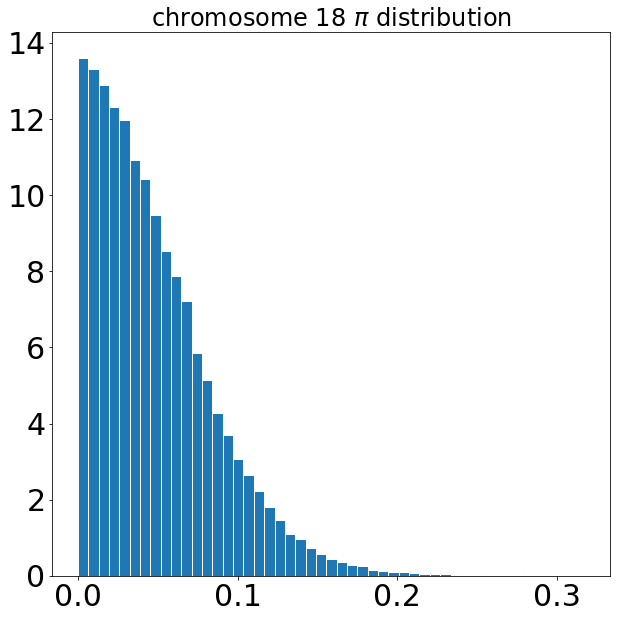

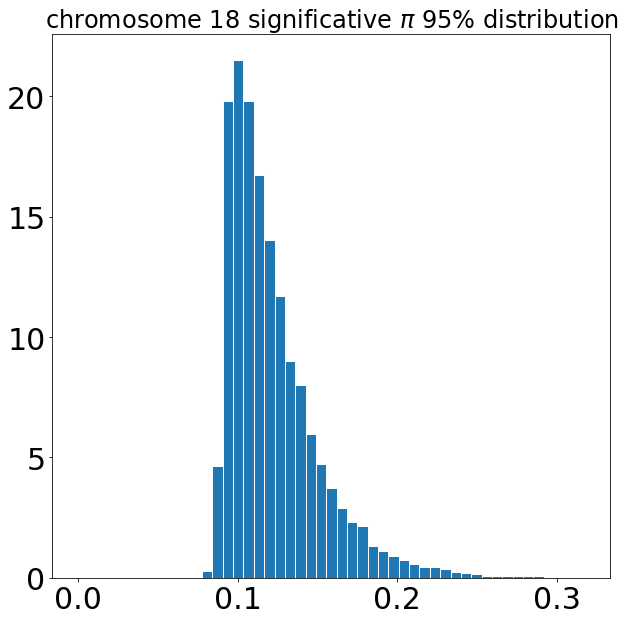

In [19]:
s = 6843463
rg = Generator(MT19937(s))

print("chromosome 18 1NP 150kb, seed = ", s , ":\n")

chr18_1NP_150kb_pi, chr18_1NP_150kb_sign_pi = single_chromosome('chr18', segregation_table_1NP_150kb['chr18']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

print( "Absolute percentage of zeros: ", (1 - 0.07146297411198077) * 0.5149334229279765 * 100)
print( "Absolute percentage of significative: ", (1 - 0.07146297411198077) * 0.059097098194550055 * 100)

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_1NP_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_150kb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_1NP_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### Pi heatmaps ###

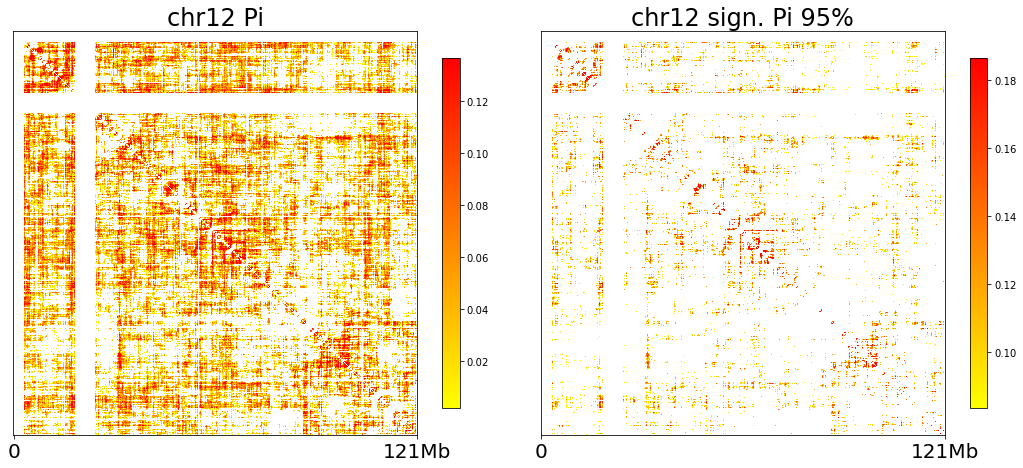

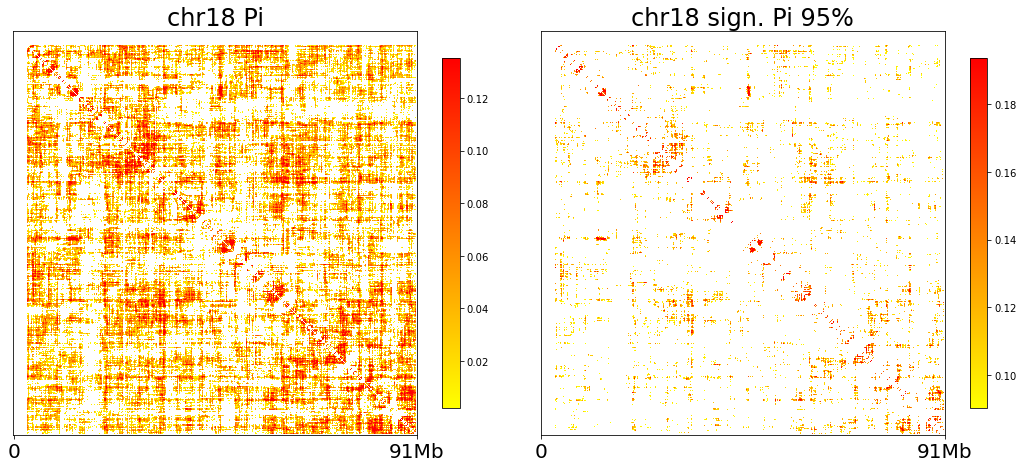

In [9]:
fig1, ax1 = plot_multiple_heatmaps(n_mats=2, mats=[chr7_1NP_150kb_pi, chr7_1NP_150kb_sign_pi], vmin = [np.nanpercentile(chr7_1NP_150kb_pi, 3), np.nanpercentile(chr7_1NP_150kb_sign_pi, 3)], vmax = [np.nanpercentile(chr7_1NP_150kb_pi, 97), np.nanpercentile(chr7_1NP_150kb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr7_ticks = [0, chr7_1NP_150kb_pi.shape[0]]
chr7_tick_labels = [0, str(int(np.ceil(chr7_1NP_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]
ax1[0].set_xticks(chr7_ticks)
ax1[0].set_yticks([])
ax1[0].set_xticklabels(chr7_tick_labels, fontsize = 20);
ax1[1].set_xticks(chr7_ticks)
ax1[1].set_yticks([])
ax1[1].set_xticklabels(chr7_tick_labels, fontsize = 20);

ax1[0].set_title("chr7 Pi", fontsize = 24);
ax1[1].set_title("chr7 sign. Pi 95%", fontsize = 24);


fig2, ax2 = plot_multiple_heatmaps(n_mats=2, mats=[chr18_1NP_150kb_pi, chr18_1NP_150kb_sign_pi], vmin = [np.nanpercentile(chr18_1NP_150kb_pi, 3), np.nanpercentile(chr18_1NP_150kb_sign_pi, 3)], vmax = [np.nanpercentile(chr18_1NP_150kb_pi, 97), np.nanpercentile(chr18_1NP_150kb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr18_ticks = [0, chr18_1NP_150kb_pi.shape[0]]
chr18_tick_labels = [0, str(int(np.ceil(chr18_1NP_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]
ax2[0].set_xticks(chr18_ticks)
ax2[0].set_yticks([])
ax2[0].set_xticklabels(chr18_tick_labels, fontsize = 20);
ax2[1].set_xticks(chr18_ticks)
ax2[1].set_yticks([])
ax2[1].set_xticklabels(chr18_tick_labels, fontsize = 20);

ax2[0].set_title("chr18 Pi", fontsize = 24);
ax2[1].set_title("chr18 sign. Pi 95%", fontsize = 24);

Questo di seguito è solo un test per calcolare le beta 

In [10]:
from src.slice_pairwise_inter_beta_evaluation import compute_s_mat_inter as compute_s_mat_inter_beta_eval

In [11]:
F_arr_A, F_arr_B = compute_tube_segregation_frequency_inter(segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table'])
F_mat = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table'])

F_mat[:, np.isnan(F_arr_B)] = np.nan
F_mat[np.isnan(F_arr_A), :] = np.nan

s_mat = compute_s_mat_inter_beta_eval(F_arr_A, F_arr_B, F_mat, effective_NPs_per_tube, F_mean)
print(np.nanmean(s_mat))

del F_arr_A, F_arr_B, F_mat, s_mat

1.3429370622394925


# $\pi$ $\beta$ evaluated # 

In [11]:
from src.slice_pairwise_inter_beta_evaluation import inter_chromosome as inter_chromosome_beta_eval

In [13]:
s = 9561361
rg = Generator(MT19937(s))

print("chromosome 7 and 18 1NP 150kb", ", beta evaluated", ", seed = ", s , ":\n")

chr7_18_1NP_150kb_pi_beta_eval, chr7_18_1NP_150kb_sign_pi_beta_eval = inter_chromosome_beta_eval(segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table'] , 'chr7', 'chr18', 95, verbose= True, save= False, ret= True, generator = rg)

print( "Absolute percentage of zeros in b = <s>: ", (1 - 0.12378631677600751) * 0.50556975220047995 * 100)
print( "Absolute percentage of significative in b = <s>: ", (1 - 0.12378631677600751) * 0.0631478434712936 * 100)


chromosome 7 and 18 1NP 150kb , beta evaluated , seed =  9561361 :


Computing inter PIs for chr7 and chr18 ...
% of NaN PI values: 12.378631677600751 %
% of PI < 0 (out of non-nans): 50.556975220047995 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 6.31478434712936 %
Mean PI value: 0.017051795902677455
STD PI value: 0.013064090870957197
Mean SIGNIFICATIVE PI value: 0.04230315790881199
STD SIGNIFICATIVE PI value: 0.008583663063968773
beta: 1.118732554492392
Done

Absolute percentage of zeros in b = <s>:  44.298713470222374
Absolute percentage of significative in b = <s>:  5.533100451563431


In [63]:
pi_nan_statistics_inter(chr7_18_1NP_150kb_pi_beta_eval, chr7_18_1NP_150kb_sign_pi_beta_eval,segregation_table_1NP_150kb['chr7']['segregation_table'], segregation_table_1NP_150kb['chr18']['segregation_table']);

number of GAM nan:	 0.1237863167760075 
number of pi<0:	 0.44298713470222373 
number of significative pi:	 0.05533100451563433


## Heatmaps ##

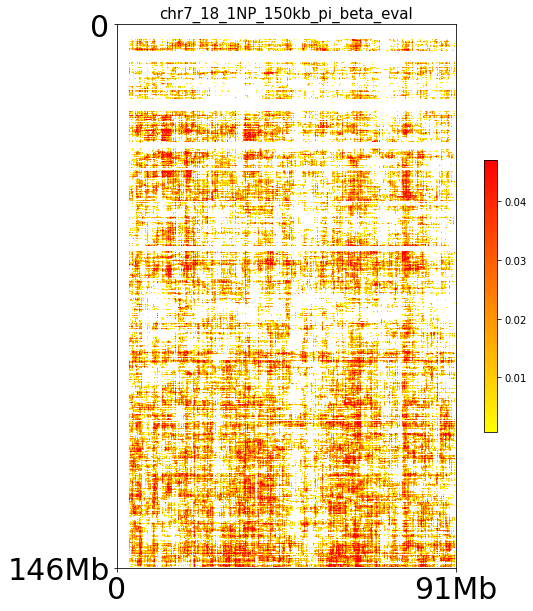

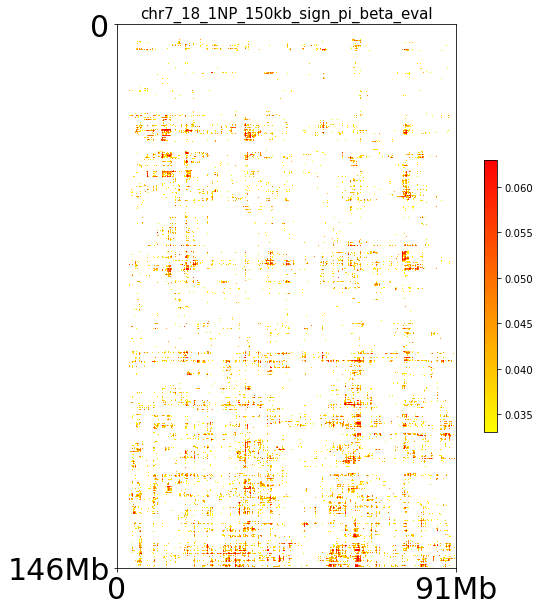

In [14]:
fig1, ax1, _, _ = plot_heatmap(chr7_18_1NP_150kb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_pi_beta_eval", colormap="autumn_r");
fig2, ax2, _, _ = plot_heatmap(chr7_18_1NP_150kb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_sign_pi_beta_eval", colormap="autumn_r");

chr7_ticks = [0, chr7_1NP_150kb_pi.shape[0]]
chr7_tick_labels = [0, str(int(np.ceil(chr7_1NP_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]

chr18_ticks = [0, chr18_1NP_150kb_pi.shape[0]]
chr18_tick_labels = [0, str(int(np.ceil(chr18_1NP_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]

for i in [ax1, ax2]:
    i.set_xticks(chr18_ticks)
    i.set_yticks(chr7_ticks)
    i.set_xticklabels(chr18_tick_labels, fontsize = 30);
    i.set_yticklabels(chr7_tick_labels, fontsize = 30);


## Histograms ##

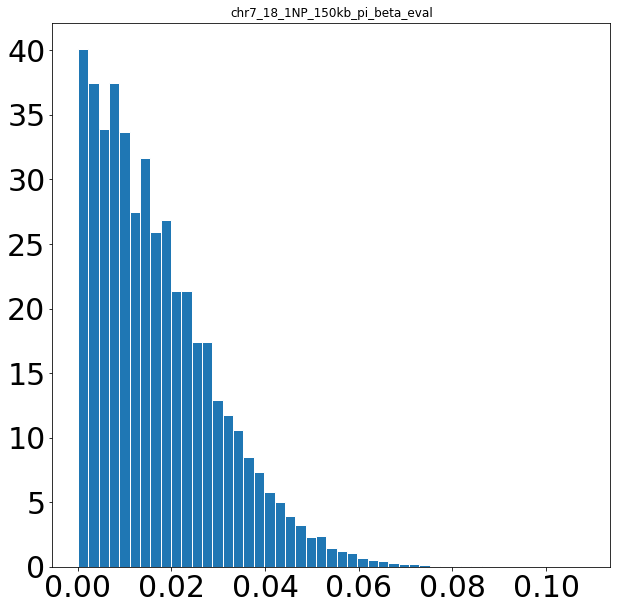

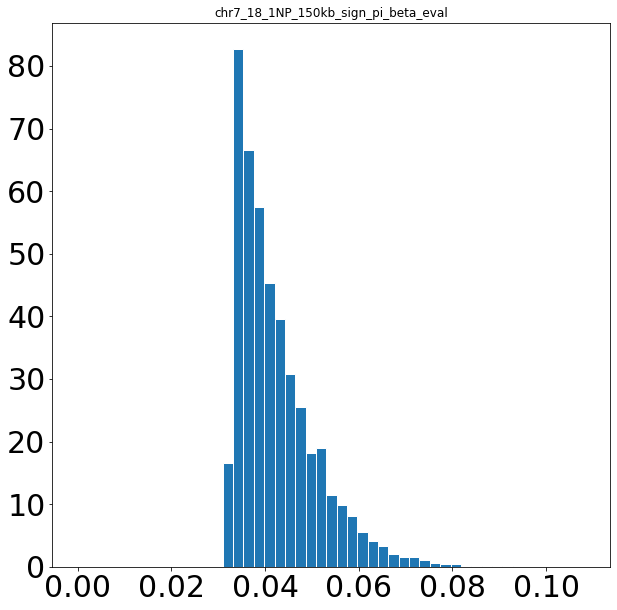

In [15]:
fig1, ax1 = plt.subplots(1, figsize = (10,10))
fig2, ax2 = plt.subplots(1, figsize = (10,10))


A = ax1.hist(chr7_18_1NP_150kb_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_18_1NP_150kb_pi_beta_eval), 50), edgecolor = "white", density = True)
ax1.set_title("chr7_18_1NP_150kb_pi_beta_eval")

B = ax2.hist(chr7_18_1NP_150kb_sign_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_18_1NP_150kb_sign_pi_beta_eval), 50), edgecolor = "white", density = True)
ax2.set_title("chr7_18_1NP_150kb_sign_pi_beta_eval")

for i in [ax1, ax2]:
    i.tick_params(axis='x', which='major', labelsize=30)
    i.tick_params(axis='y', which='major', labelsize=30)


del A, B

# WDF #

In [16]:
chr7_18_WDF_1NP_150kb = np.array([])

segregation_table_7 = segregation_table_1NP_150kb["chr7"]["segregation_table"]
chr7_WDF_1NP_150kb = compute_tube_segregation_frequency(segregation_table_7)

segregation_table_18 = segregation_table_1NP_150kb["chr18"]["segregation_table"]
chr18_WDF_1NP_150kb = compute_tube_segregation_frequency(segregation_table_18)

chr7_18_WDF_1NP_150kb = np.concatenate((chr7_WDF_1NP_150kb, chr18_WDF_1NP_150kb))

del segregation_table_7, segregation_table_18

# Save figures #

In [17]:
#save_folder = "/home/federico/Università/Tesi_magistrale/images/2_interPI_chr7_chr18_1NP_150kb.ipynb_output/"

fig1, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_pi, chr18_1NP_150kb_pi, chr7_18_1NP_150kb_pi_beta_eval, title = "Chromosomes 12 and 18 $\pi$ with $\\beta = <s>$", resolution=resolution);
fig2, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_sign_pi, chr18_1NP_150kb_sign_pi, chr7_18_1NP_150kb_sign_pi_beta_eval, title = "Chromosomes 12 and 18 sign $\pi$ with $\\beta = <s>$", resolution=resolution);
fig3, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_pi, chr18_1NP_150kb_pi, chr7_18_1NP_150kb_pi_beta_eval, title = "Chromosomes 12 and 18 $\pi$ with $\\beta = <s>$", resolution=resolution, colormap = "RdYlBu_r");
fig4, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_sign_pi, chr18_1NP_150kb_sign_pi, chr7_18_1NP_150kb_sign_pi_beta_eval, title = "Chromosomes 12 and 18 sign $\pi$ with $\\beta = <s>$", resolution=resolution, colormap = "RdYlBu_r");

fig5, ax5, _, _ = plot_heatmap(chr7_18_1NP_150kb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_pi_beta_eval", colormap="autumn_r", resolution=resolution);
fig6, ax6, _, _ = plot_heatmap(chr7_18_1NP_150kb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_sign_pi_beta_eval", colormap="autumn_r", resolution=resolution);
fig7, ax7, _, _ = plot_heatmap(chr7_18_1NP_150kb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_pi_beta_eval", colormap="RdYlBu_r", resolution=resolution);
fig8, ax8, _, _ = plot_heatmap(chr7_18_1NP_150kb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr7_18_1NP_150kb_sign_pi_beta_eval", colormap="RdYlBu_r", resolution=resolution);

fig9, ax9, _, _   = plot_heatmap(chr7_1NP_150kb_pi, x_figsize=10, y_figsize=10, title = "chr7_1NP_150kb_pi", colormap="autumn_r", resolution=resolution);
fig10, ax10, _, _ = plot_heatmap(chr7_1NP_150kb_sign_pi, x_figsize=10, y_figsize=10, title = "chr7_1NP_150kb_sign_pi", colormap="autumn_r", resolution=resolution);
fig11, ax11, _, _ = plot_heatmap(chr7_1NP_150kb_pi, x_figsize=10, y_figsize=10, title = "chr7_1NP_150kb_pi", colormap="RdYlBu_r", resolution=resolution);
fig12, ax12, _, _ = plot_heatmap(chr7_1NP_150kb_sign_pi, x_figsize=10, y_figsize=10, title = "chr7_1NP_150kb_sign_pi", colormap="RdYlBu_r", resolution=resolution);

fig13, ax13, _, _ = plot_heatmap(chr18_1NP_150kb_pi, x_figsize=10, y_figsize=10, title = "chr18_1NP_150kb_pi", colormap="autumn_r", resolution=resolution);
fig14, ax14, _, _ = plot_heatmap(chr18_1NP_150kb_sign_pi, x_figsize=10, y_figsize=10, title = "chr18_1NP_150kb_sign_pi", colormap="autumn_r", resolution=resolution);
fig15, ax15, _, _ = plot_heatmap(chr18_1NP_150kb_pi, x_figsize=10, y_figsize=10, title = "chr18_1NP_150kb_pi", colormap="RdYlBu_r", resolution=resolution);
fig16, ax16, _, _ = plot_heatmap(chr18_1NP_150kb_sign_pi, x_figsize=10, y_figsize=10, title = "chr18_1NP_150kb_sign_pi", colormap="RdYlBu_r", resolution=resolution);


fig1.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_pi_beta_eval_full_chrom_colormap1.svg', format = 'svg')
fig2.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_sign_pi_beta_eval_full_chrom_colormap1.svg', format = 'svg')
fig3.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_pi_beta_eval_full_chrom_colormap2.svg', format = 'svg')
fig4.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_sign_pi_beta_eval_full_chrom_colormap2.svg', format = 'svg')

fig5.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_pi_beta_eval_colormap1.svg', format = 'svg')
fig6.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_sign_pi_beta_eval_colormap1.svg', format = 'svg')
fig7.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_pi_beta_eval_colormap2.svg', format = 'svg')
fig8.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_sign_pi_beta_eval_colormap2.svg', format = 'svg')

fig9.savefig(save_folder +  'heatmaps/intra/chr7_1NP_150kb_pi_colormap1.svg', format = 'svg')
fig10.savefig(save_folder + 'heatmaps/intra/chr7_1NP_150kb_sign_pi_colormap1.svg', format = 'svg')
fig11.savefig(save_folder + 'heatmaps/intra/chr7_1NP_150kb_pi_colormap2.svg', format = 'svg')
fig12.savefig(save_folder + 'heatmaps/intra/chr7_1NP_150kb_sign_pi_colormap2.svg', format = 'svg')

fig13.savefig(save_folder + 'heatmaps/intra/chr18_1NP_150kb_pi_colormap1.svg', format = 'svg')
fig14.savefig(save_folder + 'heatmaps/intra/chr18_1NP_150kb_sign_pi_colormap1.svg', format = 'svg')
fig15.savefig(save_folder + 'heatmaps/intra/chr18_1NP_150kb_pi_colormap2.svg', format = 'svg')
fig16.savefig(save_folder + 'heatmaps/intra/chr18_1NP_150kb_sign_pi_colormap2.svg', format = 'svg')


plt.close(fig1);    plt.close(fig2);     plt.close(fig3);     plt.close(fig4);     plt.close(fig5);     plt.close(fig6);     plt.close(fig7);     plt.close(fig8);
plt.close(fig9);    plt.close(fig10);    plt.close(fig11);    plt.close(fig12);    plt.close(fig13);    plt.close(fig14);    plt.close(fig15);    plt.close(fig16);


del fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12, fig13, fig14, fig15, fig16

In [18]:
fig1, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_coseg, chr18_1NP_150kb_coseg, chr7_18_1NP_150kb_coseg, title = "chr7_18_1NP_150kb_coseg", resolution=resolution, colormap = "RdYlBu_r");
fig2, _, _ = plot_heatmap_two_chromosomes(chr7_1NP_150kb_npmi, chr18_1NP_150kb_npmi, chr7_18_1NP_150kb_npmi, title = "chr7_18_1NP_150kb_NPMI", resolution=resolution, colormap = "RdYlBu_r");

fig1.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_coseg_full_chrom.svg', format = 'svg')
fig2.savefig(save_folder + 'heatmaps/chr7_18/chr7_18_1NP_150kb_npmi_full_chrom.svg', format = 'svg')

plt.close(fig1);    plt.close(fig2);     

del fig1, fig2

In [19]:
fig1, ax1 = plt.subplots(1, figsize = (10,10))
fig2, ax2 = plt.subplots(1, figsize = (10,10))
fig3, ax3 = plt.subplots(1, figsize = (10,10))
fig4, ax4 = plt.subplots(1, figsize = (10,10))
fig5, ax5 = plt.subplots(1, figsize = (10,10))
fig6, ax6 = plt.subplots(1, figsize = (10,10))

ax1.hist(chr7_1NP_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_150kb_pi), 50), density = True, edgecolor = 'white');
ax1.set_title("chr7_1NP_150kb_pi\n");

ax2.hist(chr7_1NP_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr7_1NP_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax2.set_title("chr7_1NP_150kb_sign_pi\n");

ax3.hist(chr18_1NP_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_150kb_pi), 50), density = True, edgecolor = 'white');
ax3.set_title("chr18_1NP_150kb_pi\n");

ax4.hist(chr18_1NP_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax4.set_title("chr18_1NP_150kb_sign_pi\n");

ax5.hist(chr7_18_1NP_150kb_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_18_1NP_150kb_pi_beta_eval), 50), edgecolor = "white", density = True);
ax5.set_title("chr7_18_1NP_150kb_pi_beta_eval\n")

ax6.hist(chr7_18_1NP_150kb_sign_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr7_18_1NP_150kb_sign_pi_beta_eval), 50), edgecolor = "white", density = True);
ax6.set_title("chr7_18_1NP_150kb_sign_pi_beta_eval\n")

ax1.tick_params(axis='x', which='major', labelsize=30); ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30); ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30); ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30); ax4.tick_params(axis='y', which='major', labelsize=30)
ax5.tick_params(axis='x', which='major', labelsize=30); ax5.tick_params(axis='y', which='major', labelsize=30)
ax6.tick_params(axis='x', which='major', labelsize=30); ax6.tick_params(axis='y', which='major', labelsize=30)

fig1.savefig(save_folder + 'histograms/chr7_1NP_150kb_pi_hist.svg', format = 'svg')
fig2.savefig(save_folder + 'histograms/chr7_1NP_150kb_sign_pi_hist.svg', format = 'svg')
fig3.savefig(save_folder + 'histograms/chr18_1NP_150kb_pi_hist.svg', format = 'svg')
fig4.savefig(save_folder + 'histograms/chr18_1NP_150kb_sign_pi_hist.svg', format = 'svg')
fig5.savefig(save_folder + 'histograms/chr7_18_1NP_150kb_pi_hist.svg', format = 'svg')
fig6.savefig(save_folder + 'histograms/chr7_18_1NP_150kb_sign_pi_hist.svg', format = 'svg')

plt.close(fig1);    plt.close(fig2);    plt.close(fig3);    plt.close(fig4);    plt.close(fig5);    plt.close(fig6);    

del fig1, ax1, fig2, ax2, fig3, ax3, fig4, ax4, fig5, ax5, fig6, ax6

In [23]:
fig1, _, _ = plot_heatmap_window_seg_freq(chr7_18_1NP_150kb_pi_beta_eval, chr18_WDF_1NP_150kb, chr7_WDF_1NP_150kb, title = "chr7_18_1NP_150kb_pi_beta_eval", resolution=resolution)
fig2, _, _ = plot_heatmap_window_seg_freq(chr7_18_1NP_150kb_sign_pi_beta_eval, chr18_WDF_1NP_150kb, chr7_WDF_1NP_150kb, title = "chr7_18_1NP_150kb_sign_pi_beta_eval", resolution=resolution)
fig3, _, _ = plot_heatmap_window_seg_freq(chr7_18_1NP_150kb_pi_beta_eval, chr18_WDF_1NP_150kb, chr7_WDF_1NP_150kb, title = "chr7_18_1NP_150kb_pi_beta_eval", resolution=resolution, colormap = "RdYlBu_r")
fig4, _, _ = plot_heatmap_window_seg_freq(chr7_18_1NP_150kb_sign_pi_beta_eval, chr18_WDF_1NP_150kb, chr7_WDF_1NP_150kb, title = "chr7_18_1NP_150kb_sign_pi_beta_eval", resolution=resolution, colormap = "RdYlBu_r")
fig5, _, _ = plot_heatmap_window_seg_freq(chr7_18_1NP_150kb_npmi, chr18_WDF_1NP_150kb, chr7_WDF_1NP_150kb, title = "chr7_18_1NP_150kb_npmi", resolution=resolution, colormap = "RdYlBu_r")

fig1.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_pi_beta_eval_WDF_colormap1.svg', format = 'svg')
fig2.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_sign pi_beta_eval_WDF_colormap1.svg', format = 'svg')
fig3.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_pi_beta_eval_WDF_colormap2.svg', format = 'svg')
fig4.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_sign_pi_beta_eval_WDF_colormap2.svg', format = 'svg')
fig5.savefig(save_folder + 'heatmaps/inter/chr7_18_1NP_150kb_npmi.svg', format = 'svg')

plt.close(fig1);    plt.close(fig2);    plt.close(fig3);    plt.close(fig4); plt.close(fig5);

del fig1, fig2, fig3, fig4, fig5

## Stats ##

In [16]:
print( "chr7_18_1NP_150kb_pi_beta_eval:\t\t" , np.nanmean(chr7_18_1NP_150kb_pi_beta_eval),      np.nanstd(chr7_18_1NP_150kb_pi_beta_eval))
print( "chr7_18_1NP_150kb_sign_pi_beta_eval:\t" , np.nanmean(chr7_18_1NP_150kb_sign_pi_beta_eval), np.nanstd(chr7_18_1NP_150kb_sign_pi_beta_eval))

chr7_18_1NP_150kb_pi_beta_eval:		 0.017051795902677455 0.013064090870957197
chr7_18_1NP_150kb_sign_pi_beta_eval:	 0.04230315790881199 0.008583663063968773


## Significative pi comparison with intra ##

In [ ]:
fig, ax = plt.subplots(2, figsize = (10,10))

bins_ = np.linspace(0,np.nanmax(0.2), 50)

A = ax[0].hist(chr7_1NP_150kb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 7 significative $\pi$ 95% distribution", alpha = 0.5);
#B = ax.hist(chr18_1NP_150kb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 18 significative $\pi$ 95% distribution", alpha = 0.5);
C = ax[0].hist(chr7_18_1NP_150kb_sign_pi_beta_1.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr7_18_1NP_150kb_sign_pi_beta_1", alpha = 0.5)
#D = ax.hist(chr7_18_1NP_150kb_sign_pi_beta_eval.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr7_18_1NP_150kb_sign_pi_beta_eval", alpha = 0.5 )


A = ax[1].hist(chr7_1NP_150kb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 7 significative $\pi$ 95% distribution", alpha = 0.5);
#B = ax.hist(chr18_1NP_150kb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 18 significative $\pi$ 95% distribution", alpha = 0.5);
#C = ax.hist(chr7_18_1NP_150kb_sign_pi_beta_1.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr7_18_1NP_150kb_sign_pi_beta_1", alpha = 0.5)
D = ax[1].hist(chr7_18_1NP_150kb_sign_pi_beta_eval.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr7_18_1NP_150kb_sign_pi_beta_eval", alpha = 0.5 )

ax[0].legend()

ax[0].tick_params(axis='x', which='major', labelsize=30)
ax[0].tick_params(axis='y', which='major', labelsize=30)

ax[1].legend()

ax[1].tick_params(axis='x', which='major', labelsize=30)
ax[1].tick_params(axis='y', which='major', labelsize=30)

del fig, ax

# coseg - $\pi$ correlations #

pearson			spearman
 0.6088988529913599 	 0.6250683251471812
pearson			spearman
 0.6014556931693138 	 0.6344305383336706
pearson			spearman
 0.9106239857385799 	 0.9049173790178028
pearson			spearman
 0.8823006604990745 	 0.8643615107353008


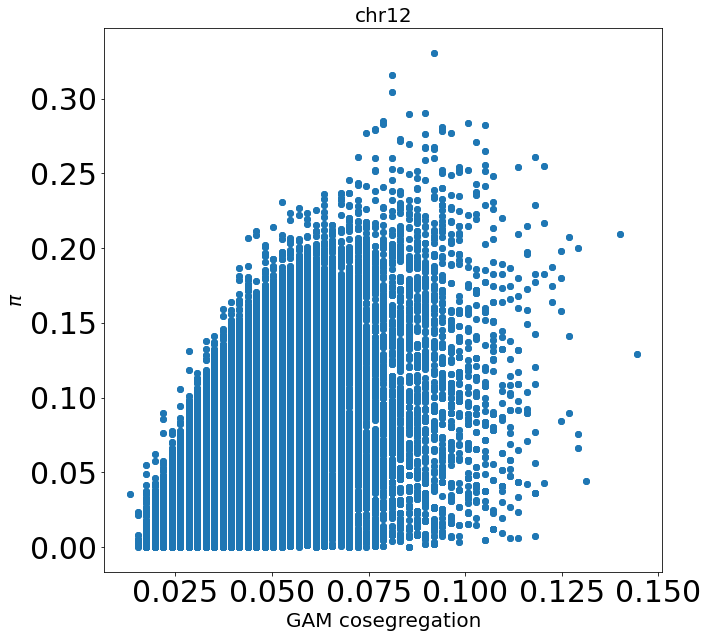

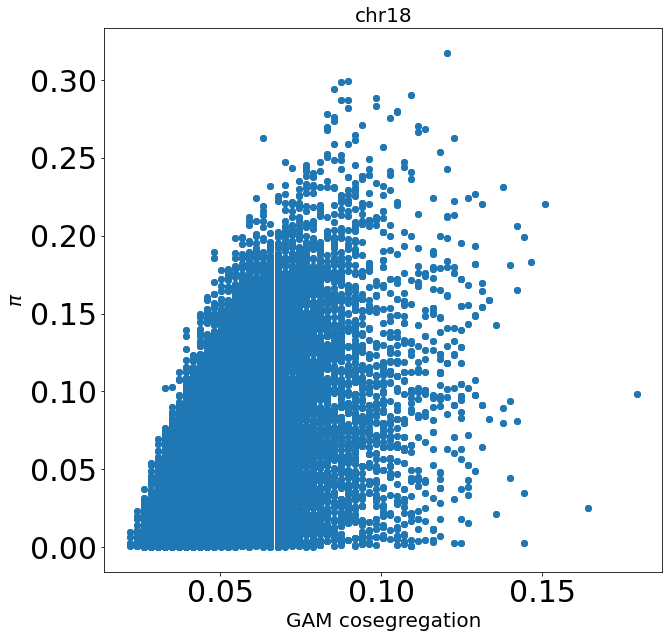

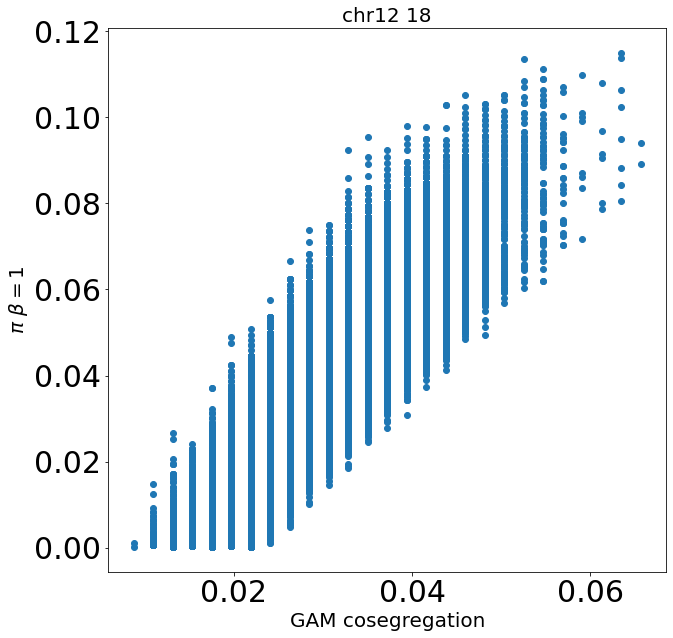

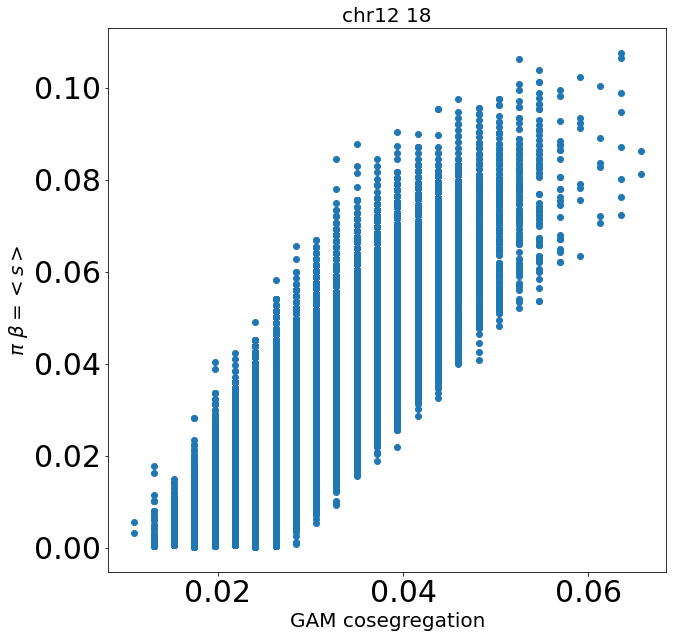

In [46]:
matrix_correlation(chr7_1NP_150kb_coseg, chr7_1NP_150kb_pi, verbose_print=True)
scatter_matrices(chr7_1NP_150kb_coseg, chr7_1NP_150kb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr7");

matrix_correlation(chr18_1NP_150kb_coseg, chr18_1NP_150kb_pi, verbose_print=True)
scatter_matrices(chr18_1NP_150kb_coseg, chr18_1NP_150kb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr18");

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_1, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_1, x_label="GAM cosegregation", y_label="$\pi$ $\\beta = 1$", title="chr7 18");

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_eval, x_label="GAM cosegregation", y_label="$\pi$ $\\beta = <s>$", title="chr7 18");

pearson			spearman
 0.6661358929279527 	 0.6363517638604755
pearson			spearman
 0.637484158207558 	 0.6087795000960999
pearson			spearman
 0.7667464731872505 	 0.7063463862778921
pearson			spearman
 0.7059036234894538 	 0.6451849917707313


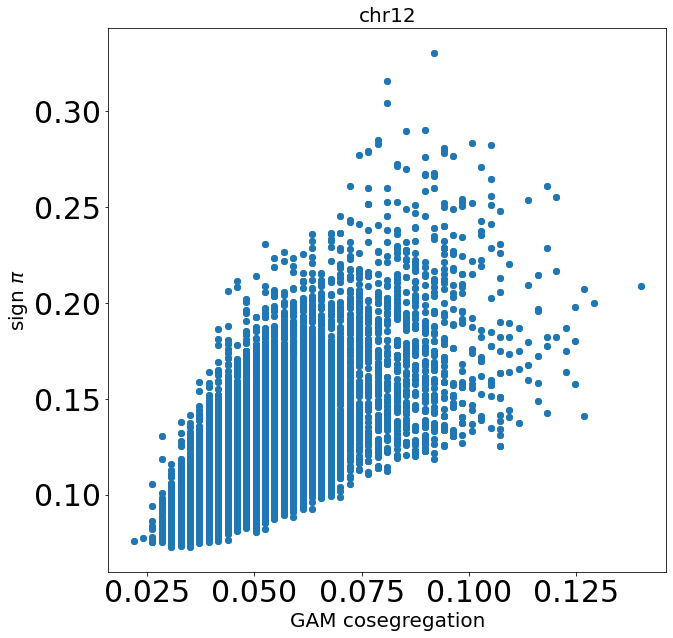

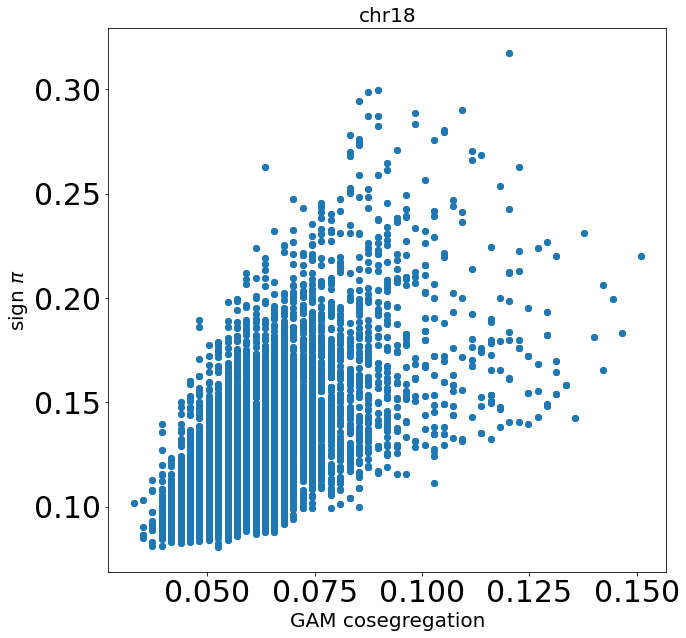

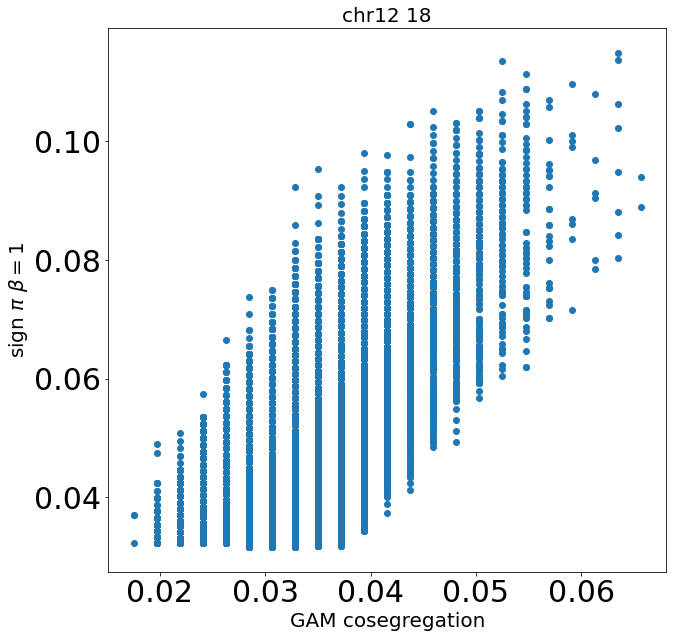

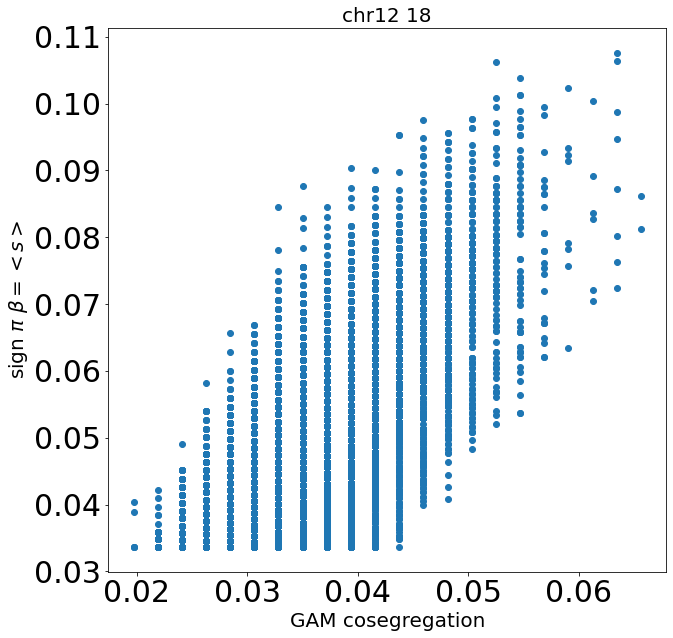

In [47]:
matrix_correlation(chr7_1NP_150kb_coseg, chr7_1NP_150kb_sign_pi, verbose_print=True)
scatter_matrices(chr7_1NP_150kb_coseg, chr7_1NP_150kb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr7");

matrix_correlation(chr18_1NP_150kb_coseg, chr18_1NP_150kb_sign_pi, verbose_print=True)
scatter_matrices(chr18_1NP_150kb_coseg, chr18_1NP_150kb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr18");

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_sign_pi_beta_1, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_sign_pi_beta_1, x_label="GAM cosegregation", y_label="sign $\pi$ $\\beta = 1$", title="chr7 18");

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_sign_pi_beta_eval, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_sign_pi_beta_eval, x_label="GAM cosegregation", y_label="sign $\pi$ $\\beta = <s>$", title="chr7 18");

pearson			spearman
 0.8621668839476577 	 0.8300720574359631
pearson			spearman
 0.8272103024012057 	 0.771069441243428
pearson			spearman
 0.8305215505460057 	 0.8419912961723642


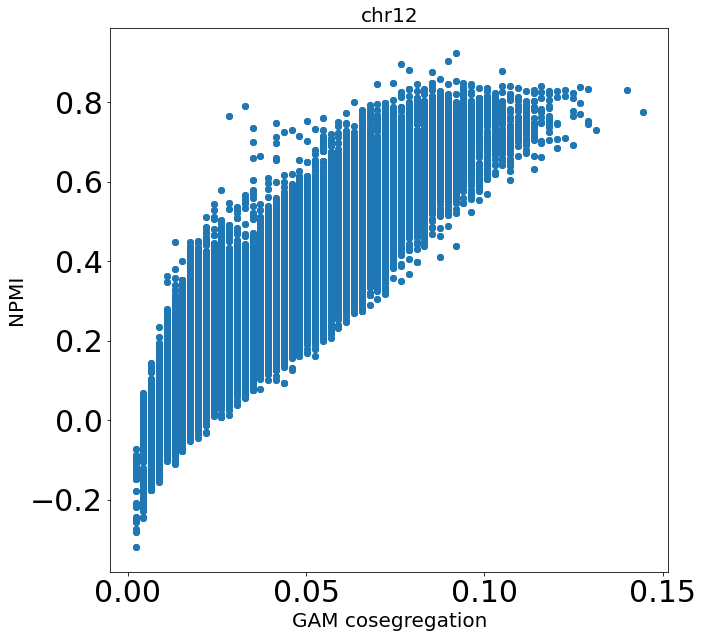

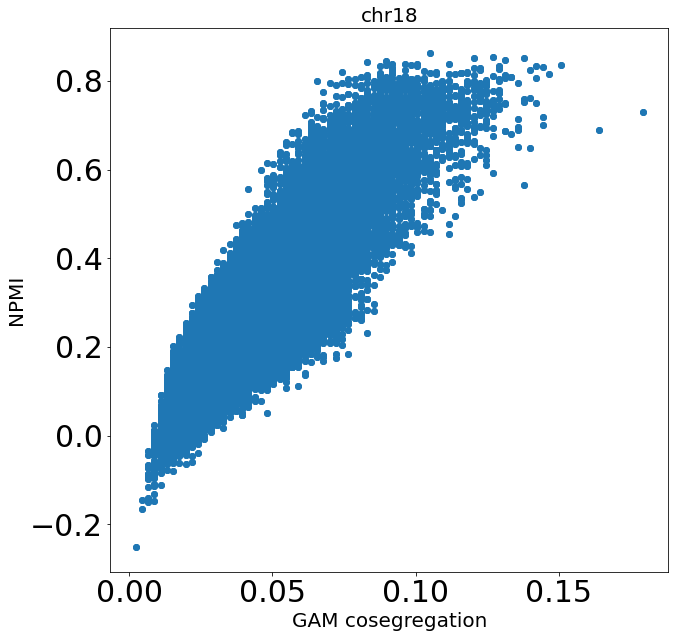

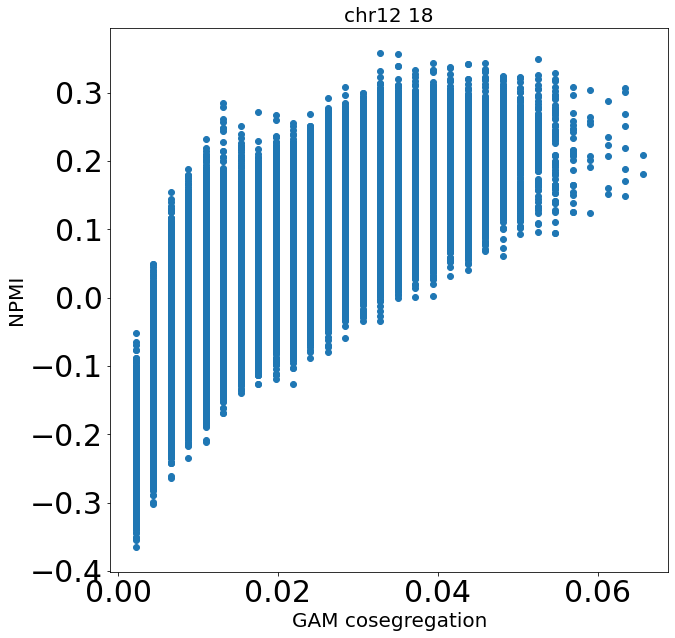

In [48]:
matrix_correlation(chr7_1NP_150kb_coseg, chr7_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_1NP_150kb_coseg, chr7_1NP_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr7");

matrix_correlation(chr18_1NP_150kb_coseg, chr18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr18_1NP_150kb_coseg, chr18_1NP_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr18");

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr7 18");


pearson			spearman
 0.5719209100356091 	 0.6076126833847579
pearson			spearman
 0.5825927458795613 	 0.6288432547095382
pearson			spearman
 0.8646982082750707 	 0.8411479452433531


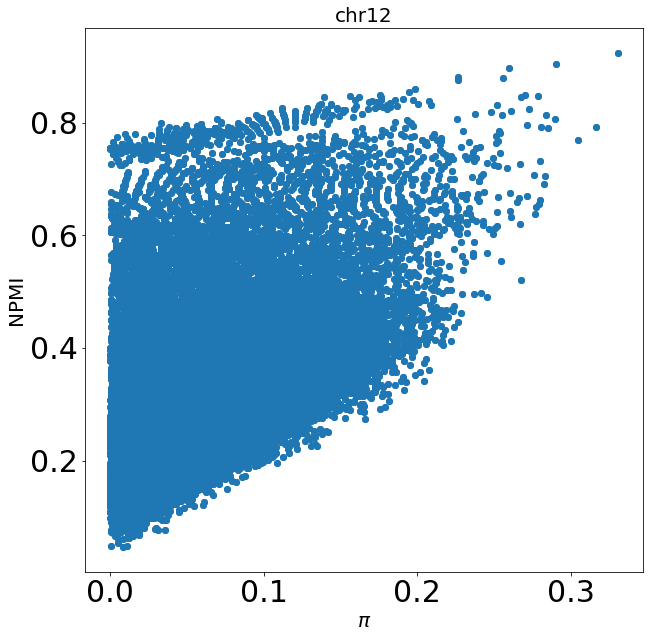

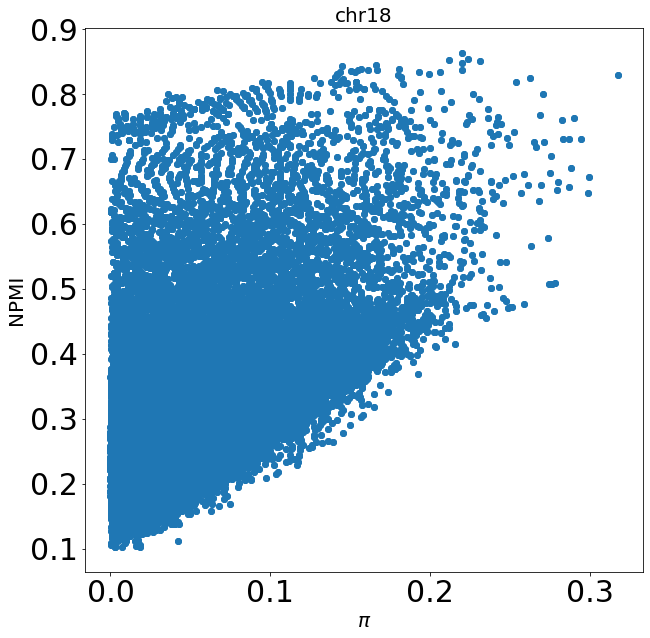

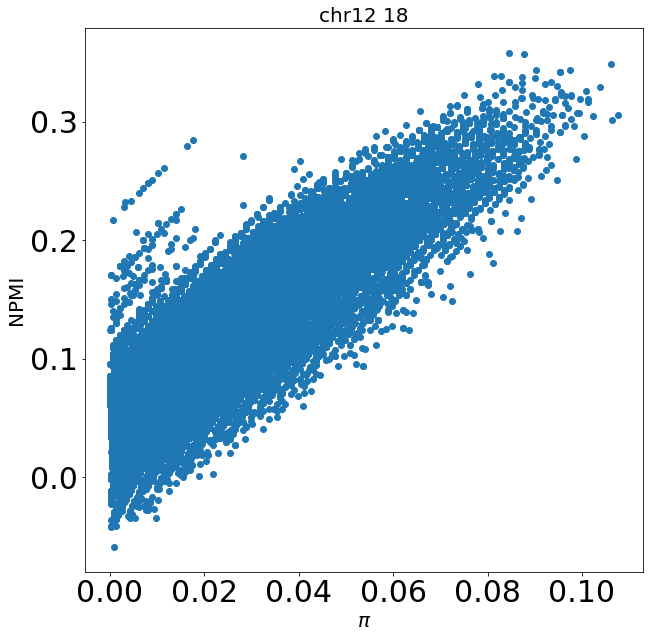

In [49]:
matrix_correlation(chr7_1NP_150kb_pi, chr7_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_1NP_150kb_pi, chr7_1NP_150kb_npmi, x_label="$\pi$", y_label="NPMI", title="chr7");

matrix_correlation(chr18_1NP_150kb_pi, chr18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr18_1NP_150kb_pi, chr18_1NP_150kb_npmi, x_label="$\pi$", y_label="NPMI", title="chr18");

matrix_correlation(chr7_18_1NP_150kb_pi_beta_eval, chr7_18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_pi_beta_eval, chr7_18_1NP_150kb_npmi, x_label="$\pi$", y_label="NPMI", title="chr7 18");

pearson			spearman
 0.6914397694853424 	 0.6910682313709449
pearson			spearman
 0.6857931642353329 	 0.7010741957394594
pearson			spearman
 0.7274855028223874 	 0.6634448092422462


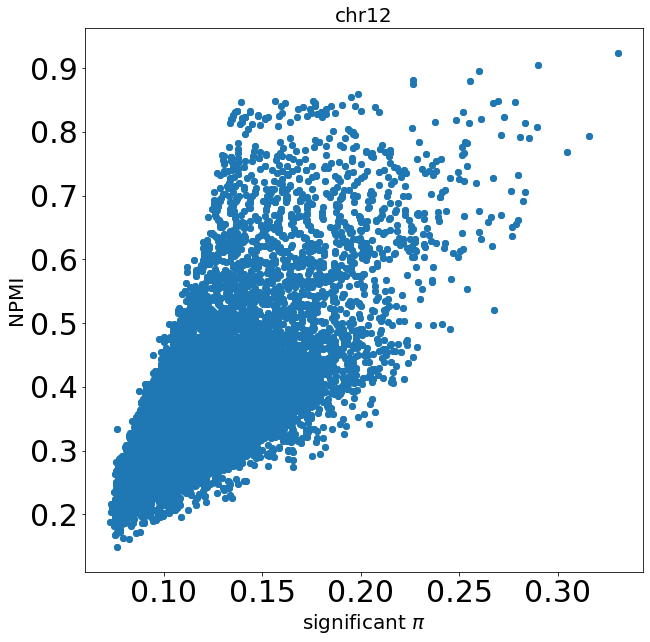

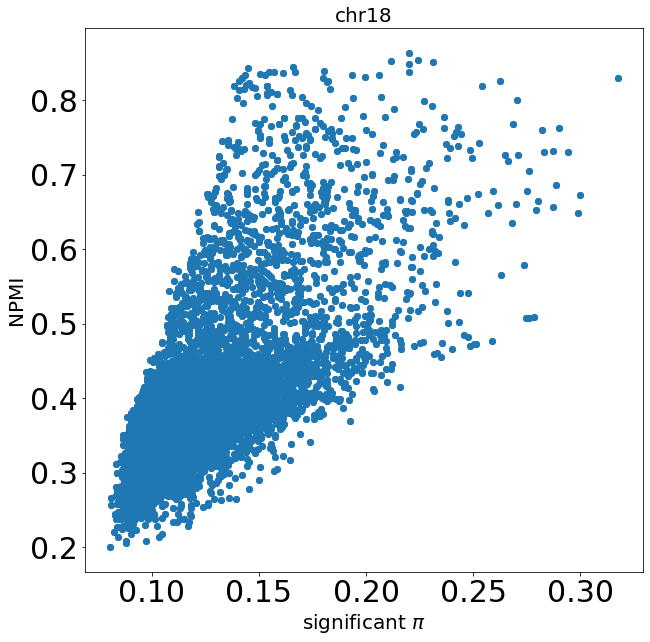

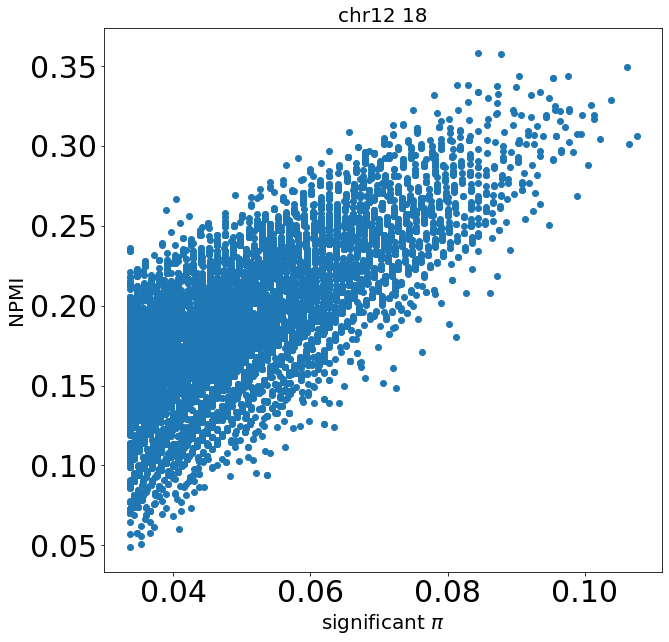

In [51]:
matrix_correlation(chr7_1NP_150kb_sign_pi, chr7_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_1NP_150kb_sign_pi, chr7_1NP_150kb_npmi, x_label="significant $\pi$", y_label="NPMI", title="chr7");

matrix_correlation(chr18_1NP_150kb_sign_pi, chr18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr18_1NP_150kb_sign_pi, chr18_1NP_150kb_npmi, x_label="significant $\pi$", y_label="NPMI", title="chr18");

matrix_correlation(chr7_18_1NP_150kb_sign_pi_beta_eval, chr7_18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_sign_pi_beta_eval, chr7_18_1NP_150kb_npmi, x_label="significant $\pi$", y_label="NPMI", title="chr7 18");

# F_i x F_j #

In [ ]:
F_arr_genomewide_1NP_150kb = np.array([])

chr_list = ["chr1", "chr2", "chr3", "chr4",
                             "chr5", "chr6", "chr7", "chr8",
                             "chr9", "chr10", "chr11", "chr7",
                             "chr13", "chr14", "chr15", "chr16",
                             "chr17", "chr18", "chr19"]

for chr in chr_list:
    segregation_table = segregation_table_1NP_150kb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_1NP_150kb = np.concatenate((F_arr_genomewide_1NP_150kb, F_arr))
    del F_arr

del segregation_table

In [ ]:
F_i_outer_Fj_1NP_150kb = np.outer(F_arr_genomewide_1NP_150kb, F_arr_genomewide_1NP_150kb)
F_i_outer_Fj_1NP_150kb[F_i_outer_Fj_1NP_150kb == 0] = np.nan
np.fill_diagonal(F_i_outer_Fj_1NP_150kb, np.nan)

In [ ]:
chr7_start, chr7_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)

In [ ]:
matrix_correlation(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$", title="chr7 18 inter", 
    colors = (chr7_18_1NP_150kb_sign_pi_beta_eval == chr7_18_1NP_150kb_sign_pi_beta_eval).astype(int) );

matrix_correlation(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr7_18_1NP_150kb_coseg, chr7_18_1NP_150kb_pi_beta_eval, x_label="GAM coseg", y_label="$\pi$", title="chr7 18 inter", 
    colors = (chr7_18_1NP_150kb_sign_pi_beta_eval == chr7_18_1NP_150kb_sign_pi_beta_eval).astype(int) );

## correlations of $F_i x F_j$ in intra chr7 ##

In [ ]:
matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr7");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr7 ");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr7 ");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr7_start:chr7_end], chr7_1NP_150kb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr7 ");

## correlations of $F_i x F_j$ in inter chr7 18 ##

In [ ]:
matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr7 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr7 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_1, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_1, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr7 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_150kb[chr7_start:chr7_end, chr18_start:chr18_end], chr7_18_1NP_150kb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr7 18 inter");